
  # Problem Set 4, Metrics 717, Spring 22

  Author: 

    name: Giselle Labrador Badia

    email: labradorbada@wisc.edu
    
  
  This notebook contains the solutions and the main code to solve PS4. Auxiliary functions are in "ps4_model.jl".


In [472]:
# importing libraries
using Random, Plots

In [449]:
# including Primitives and functions of the model 
include("./ps4_model.jl");

### a) Why a normalization of $\pi_1=\pi_2=1$ will be without any loss of generality in this model.

Consider two identical observed wages $W_{i1}$, $W_{j2}$, such that $W_{i1} = W_{j2}$ for the two occupations 1 and 2. It is true that 
$$\pi_1 S_{i1} = \pi_1 S_{i1}  $$
$$S_{j2} = \frac{\pi_1}{\pi_2} S_{i1}  $$
Since neither the skill of the individuals $i$ and $j$ nor the occupation specific prices $\pi_1$ and $\pi_2$ are observable, we dont know if the observed wage is due to a very valued occupation or a very high skill. Therefore,  we can normalized prices to 1, that is equivalent to assuming that the skill contains the occupation specific prices. Since we cannot separetely identify the prices, we could assume that the prices are reflected in the mean of the log skills in the following way:

$$W_{ik} = \pi_k S_{ik} =  \pi_k e^{\mu_{k} + \epsilon_{ik}} = e ^{(\ln \pi_k + \mu_{k} + \epsilon_{ik})}= e ^{( \mu_k' + \epsilon_{ik})}$$
where $\mu_k' = \ln \pi_k + \mu_{k}$.





### b) Compute model given parameters and N simulated individuals.

The method *simulate* creates from a primitive of the model (set of parameters), a simulated set of individuals. A demonstration and descriptive statistics for the data created are below.

In [444]:
# from set of paramters computing remaining of the primitives of the model
θ = initialize([1.0, 1.0, 2, 1, 0.5, 0.5, 0.25])

Primitives
  π₁: Float64 1.0
  π₂: Float64 1.0
  μ₁: Float64 2.0
  μ₂: Float64 1.0
  σ₁: Float64 0.5
  σ₂: Float64 0.5
  ρ: Float64 0.25
  Σ: Array{Float64}((2, 2)) [0.25 0.0625; 0.0625 0.25]


In [468]:
# Given paramters, simulating n= 1000 individuals
data = simulate(θ,n= 1000)
describe(data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,ind,500.5,1,500.5,1000,0,Int64
2,d,0.944,0,1.0,1,0,Int64
3,wage,8.17559,1.47855,7.2903,34.9914,0,Float64


### c) Find vector of parameters such that 60% of individuals choose occupation 1.

I performed a naive search in the space of $\sigma_2$ leaving other parameters fixed. This gives easy and convenient numbers to get the full set of parameters that comply with a population of 60 % choosing occupation 1. A full search in the whole space could have been carried as well, but this would have yield one of the many multiple solutions that within an range approximates to satisfying this condition. 


In [473]:
θ = initialize(get_params_percent(0.6))

Primitives
  π₁: Float64 1.0
  π₂: Float64 1.0
  μ₁: Float64 1.2
  μ₂: Float64 1.0
  σ₁: Float64 0.5
  σ₂: Float64 0.951817
  ρ: Float64 0.5
  Σ: Array{Float64}((2, 2)) [0.25 0.23795425; 0.23795425 0.905955601489]


In [397]:
println("The fraction of the individuals who choose to work in industry 1 is ",mean(simulate(θ).d))

The fraction of the individuals who choose to work in industry 1 is 0.603


### d) Consistent estimator.

The estimator chosen is the simulated method of moments estimator:
$$ \text{argmin}_\theta \quad (\hat{g} - \hat{g}(\theta))'W(\hat{g} - \hat{g}(\theta))$$
where $\hat{g}$ are the moments from the original data, and $\hat{g}(\theta)$ are the simulaterd moments, and the weight matrix $W$ is any positive semidefinite matrix. 
I use five moments to identify and estimate the parameters: $E[d]$, $E[w|d=0]$, $E[w|d=1]$, $V[w|d=0]$, $V[w|d=1]$. This estimator is consistent because we used 5 moments and we are trying to identify two parameters.

### e) Using c) as true population parameters, write a program to compute estimator in d) for only $\mu_1$ and $\rho$ parameters.

Below, I use the simulated method of moments to estimate the two parameters; code is on attached .jl file. First, a table with descriptive statistics about the data simulated from the real parameters is shown. 

In [481]:
t = [1.0, 1.0, 1.2, 1, 0.5, 0.9, 0.5]
θₜ = initialize(t)   # true model parameters to primitive
data =  simulate(θₜ ,n= 100000)
est = simulated_method_moments(data, vcat(t[1:2], t[4:6]));
describe(data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,ind,50000.5,1,50000.5,100000,0,Int64
2,d,0.60438,0,1.0,1,0,Int64
3,wage,5.09446,0.438839,3.97658,140.587,0,Float64


The full set of parameters including the estimated values for $\mu_1$ and $\rho$ is the following. 

In [480]:

est_vector = vcat(t[1:2],est[1], t[4:6], est[2]);
θ = initialize(est_vector)


Primitives
  π₁: Float64 1.0
  π₂: Float64 1.0
  μ₁: Float64 1.2000000218451872
  μ₂: Float64 1.0
  σ₁: Float64 0.5
  σ₂: Float64 0.9
  ρ: Float64 0.49999991475400607
  Σ: Array{Float64}((2, 2)) [0.25 0.22499996163930275; 0.22499996163930275 0.81]


### f) Figures that show identification of true parameters

The identification figures are below.



In [437]:

μs = (θ.μ₁-0.7):0.001:(θ.μ₁+0.7)
ρs = (θ.ρ-0.4):0.001:(θ.ρ+0.4)

ĝ = get_moments(data)
μobj= [simulated_method_moments_objective(vcat(t[1:2],x, t[4:7]), ĝ) for x in μs];
ρobj = [simulated_method_moments_objective(vcat(t[1:6],x), ĝ) for x in ρs];

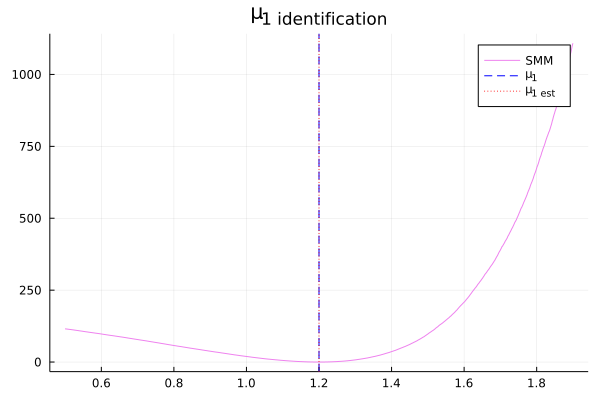

In [438]:
plot(μs, μobj, labels="SMM", title="\\mu_1 identification", color = "violet")
plot!([θ.μ₁], seriestype="vline", labels="\\mu_1 ", linestyle=:dash, color = "blue")
plot!([est[1]], seriestype="vline", labels="\\mu_1 est ", linestyle=:dot, color = "red")

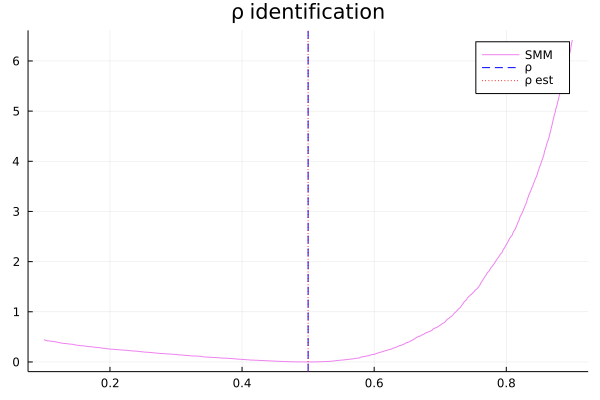

In [439]:
plot(ρs, ρobj, labels="SMM", title="\\rho identification", color = "violet")
plot!([θ.ρ], seriestype="vline", labels="\\rho ", linestyle=:dash, color = "blue")
plot!([est[2]], seriestype="vline", labels="\\rho est ", linestyle=:dot, color = "red")

### g) Moments to table

The estimates in a table are below. There are not exactly the same, but we are rounding after 5 decimal numbers. 

In [482]:
estimates_table = DataFrame(parameters = ["mu", "rho"],
                    real = [θₜ.μ₁, θₜ.ρ],
                    estimate = [θ.μ₁, θ.ρ])

,parameters,real,estimate
,String,Float64,Float64
1,mu,1.2,1.2
2,rho,0.5,0.5


 A table with the sample fit is shown below. 


In [440]:
simu = simulate(initialize(t),n= 10000)
moments = DataFrame(moments = ["E[d]", "E[w|d=0]", "E[w|d=1]", "V[w|d=0]", "V[w|d=1]"],
                    data = get_moments(data),
                    sim =get_moments(simu))


,moments,data,sim
,String,Float64,Float64
1,E[d],0.60438,0.6062
2,E[w|d=0],7.00807,6.93408
3,E[w|d=1],3.84184,3.80843
4,V[w|d=0],33.6128,29.497
5,V[w|d=1],4.25088,4.12823


### h) Find a counterfactual minimum wage policy such that under this policy 70 percent of the population choose occupation 1.


The counterfactual policy to get 70% of the population to choose occupation 1 is calculated. I find that a lower bound in salary of approximately 3.4 will achive this result given my parameters. Moments are also shown below.

In [461]:
w_lb = get_wlowerbound_percent(0.7, t)

3.4204

In [466]:
simu_counterfactual = simulate(initialize(t),w1lowerbound = w_lb)
moments = DataFrame(moments = ["E[d]", "E[w|d=0]", "E[w|d=1]", "V[w|d=0]", "V[w|d=1]"],
                    baseline = get_moments(data),
                    counterfactual = get_moments(simu_counterfactual))


,moments,baseline,counterfactual
,String,Float64,Float64
1,E[d],0.60438,0.7
2,E[w|d=0],7.00807,8.02778
3,E[w|d=1],3.84184,4.21219
4,V[w|d=0],33.6128,33.279
5,V[w|d=1],4.25088,2.14142
